# Principal Component Analysis with Cancer Data

In [2]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [4]:
df= pd.read_csv('Cancer.csv')
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


Id columns is to identify rows hence can be skipped in analysis
All columns have numerical values
Class would be the target variable. Should be removed when PCA is done

In [3]:
df_new= df.drop(['ID'], axis=1)
df_new.head(20)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
df_new.dtypes

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [5]:
df_new.shape

(699, 10)

In [6]:
df_new.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ClumpThickness,699,NaN,NaN,NaN,4.41774,2.81574,1,2,4,6,10
Cell Size,699,NaN,NaN,NaN,3.13448,3.05146,1,1,1,5,10
Cell Shape,699,NaN,NaN,NaN,3.20744,2.97191,1,1,1,5,10
Marginal Adhesion,699,NaN,NaN,NaN,2.80687,2.85538,1,1,1,4,10
Single Epithelial Cell Size,699,NaN,NaN,NaN,3.21602,2.2143,1,2,2,4,10
Bare Nuclei,699,11,1,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal Nucleoli,699,NaN,NaN,NaN,3.43777,2.43836,1,2,3,5,10
Bland Chromatin,699,NaN,NaN,NaN,2.86695,3.05363,1,1,1,4,10
Mitoses,699,NaN,NaN,NaN,1.58941,1.71508,1,1,1,1,10
Class,699,NaN,NaN,NaN,2.68956,0.951273,2,2,2,4,4


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [7]:
# We could see "?" values in column, this should be removed from data set
# Check for missing value in any other column
df_new.isna().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [8]:
# No missing values found. So let us try to remove ? from bare nuclei column
# Get count of rows having ?
(df_new['Bare Nuclei'] =='?').sum()

16

In [9]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
df_new['Bare Nuclei'].replace({'?':1}, inplace=True)

In [10]:
(df_new['Bare Nuclei'] =='?').sum()

0

In [11]:
df_new=df_new.astype({'Bare Nuclei': int})

In [12]:
df_new.dtypes

ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [13]:
# Check for correlation of variable
corr=df_new.corr()
corr

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


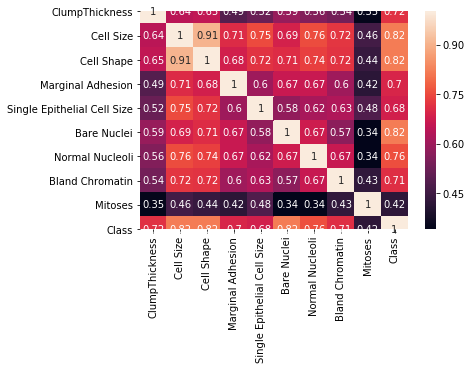

In [14]:
sns.heatmap(corr,annot= True)

 Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
and bland chromatin
 Target variable shows high correlation with most of these variables

C:\Users\shadmani\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\shadmani\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


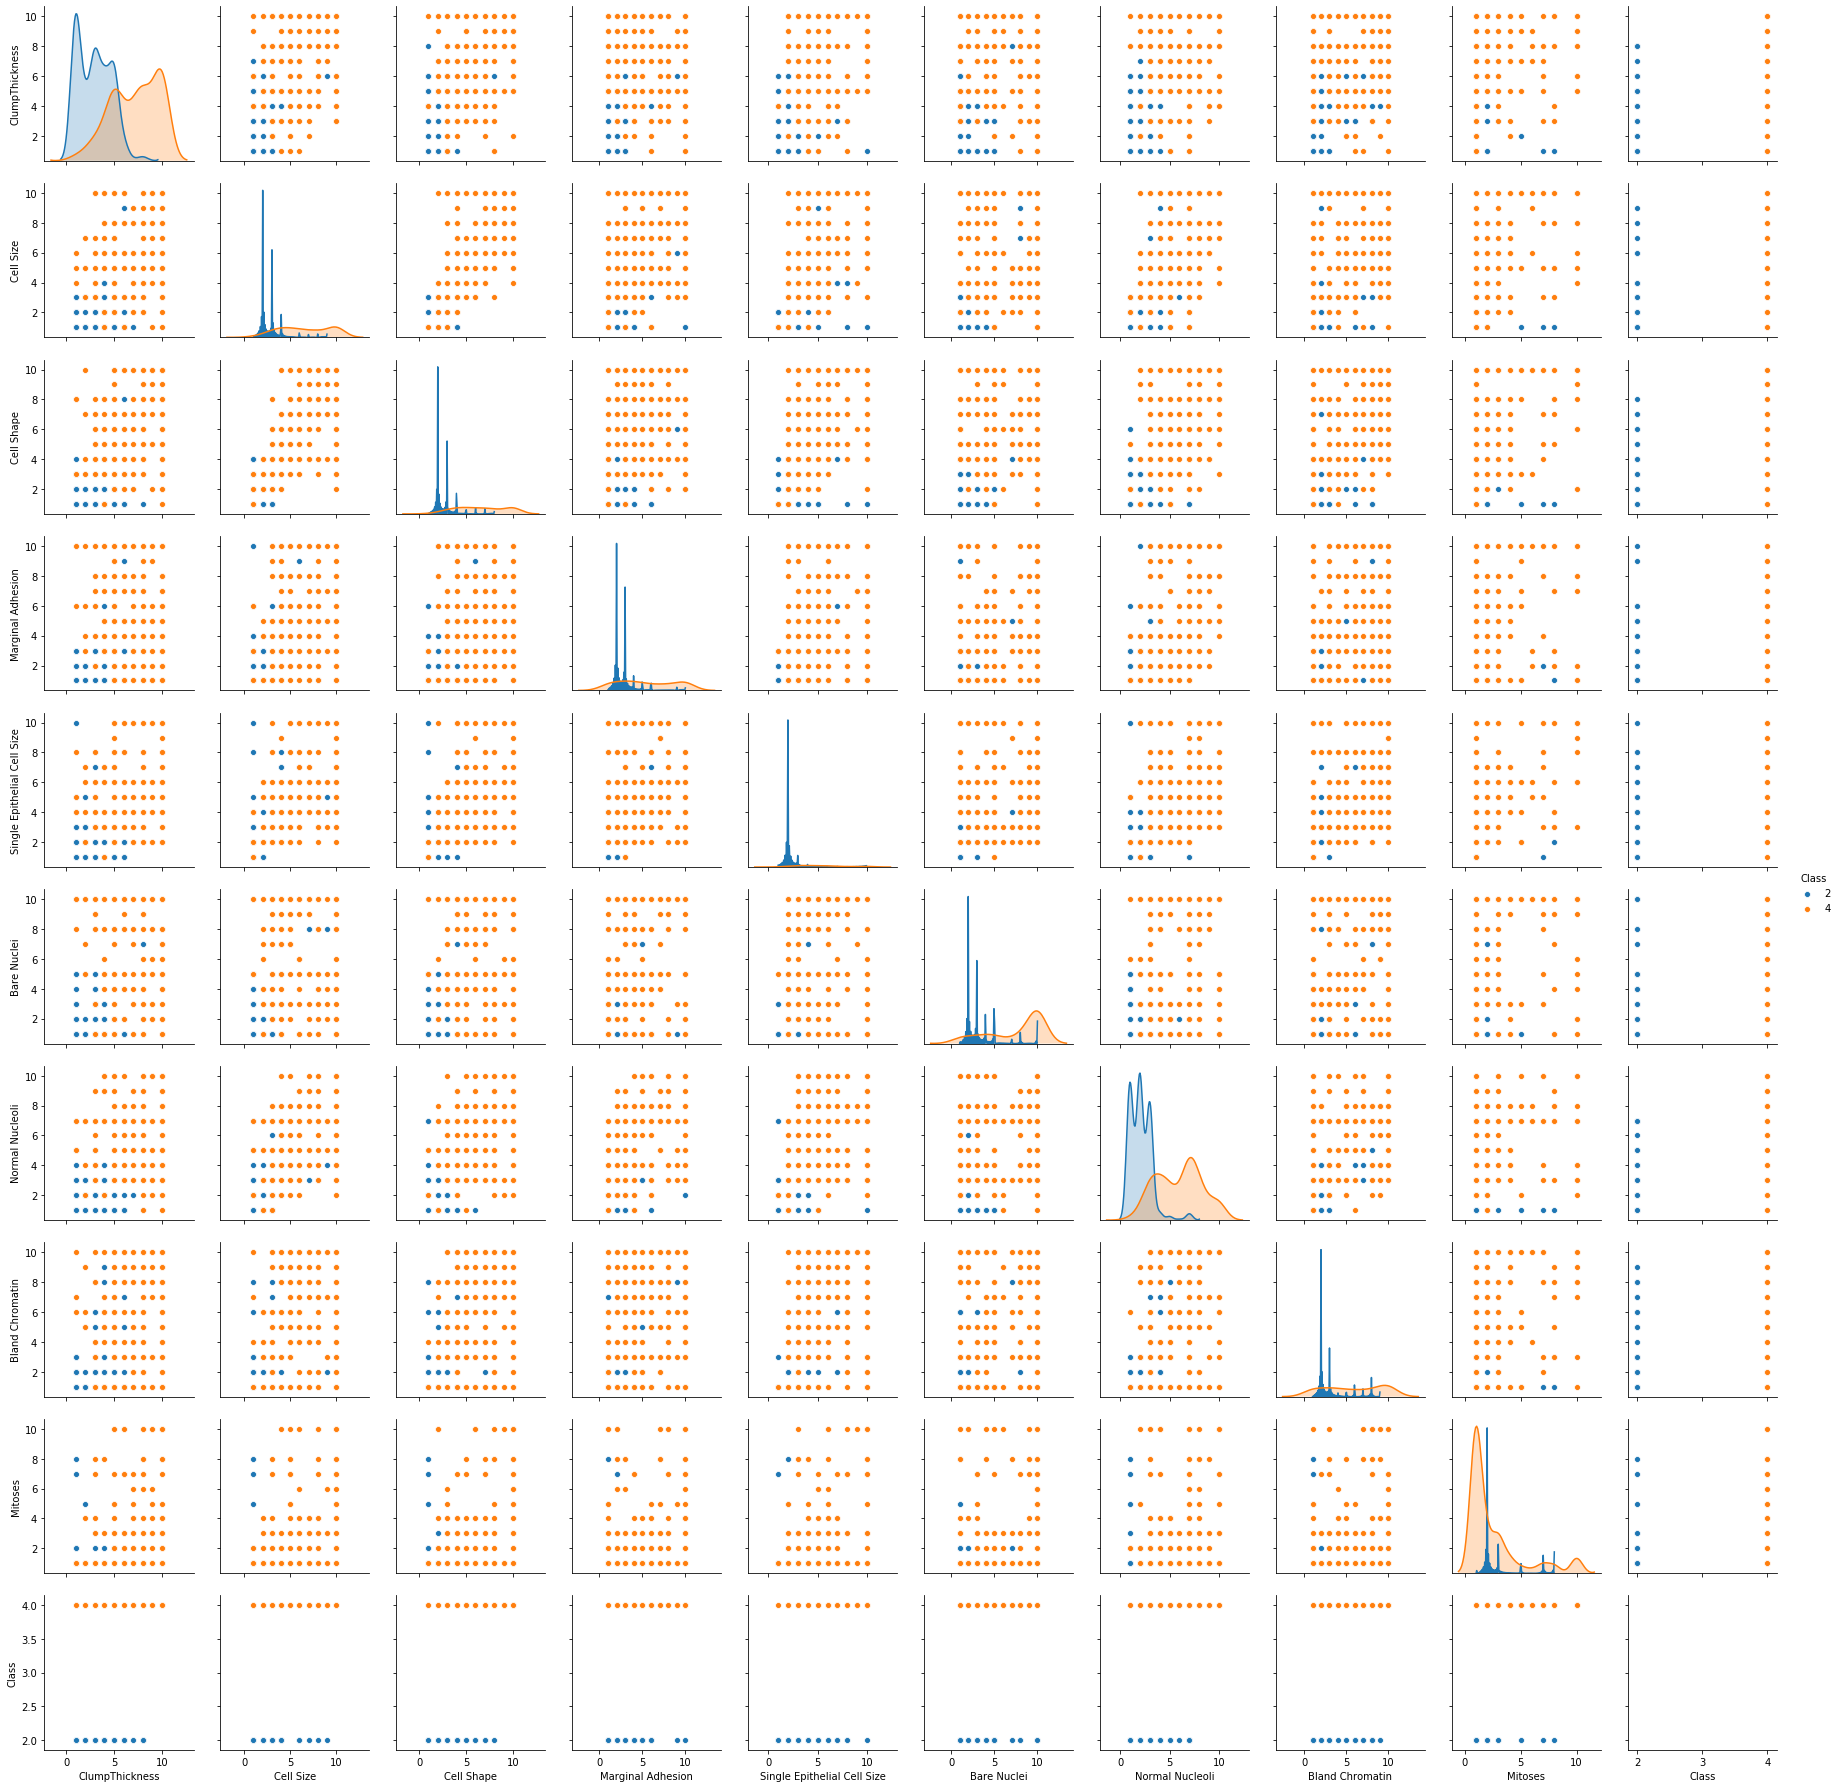

In [15]:
#Let us check for pair plots
sns.pairplot(df_new, diag_kind = 'kde', hue = 'Class')

Relationship between variables shows come correlation. 
Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

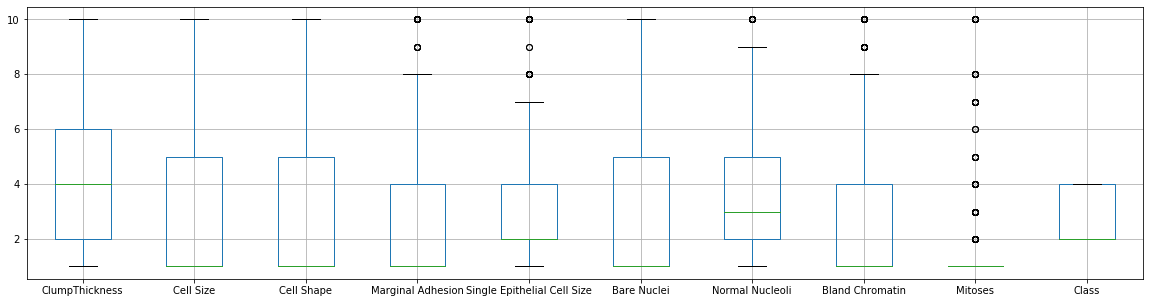

In [16]:

df_new.boxplot(figsize= (20,5))


In [17]:
pd.crosstab(df_new['Marginal Adhesion'],df_new['Class'])

Class,2,4
Marginal Adhesion,,
1,375,32
2,37,21
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [18]:
df_new['Marginal Adhesion'] = np.where(df_new['Marginal Adhesion'] >4,4,df_new['Marginal Adhesion'])

In [19]:
pd.crosstab(df_new['Single Epithelial Cell Size'],df_new['Class'])


Class,2,4
Single Epithelial Cell Size,,
1,46,1
2,363,23
3,29,43
4,7,41
5,5,34
6,2,39
7,3,9
8,2,19
9,0,2


In [20]:
df_new['Single Epithelial Cell Size'] = np.where(df_new['Single Epithelial Cell Size'] >4,4,df_new['Single Epithelial Cell Size'])

In [21]:
pd.crosstab(df_new['Single Epithelial Cell Size'],df_new['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,46,1
2,363,23
3,29,43
4,20,174


In [22]:
pd.crosstab(df_new['Normal Nucleoli'],df_new['Class'])

Class,2,4
Normal Nucleoli,,
1,150,2
2,159,7
3,129,36
4,8,32
5,4,30
6,1,9
7,7,66
8,0,28
9,0,11


In [23]:
df_new['Normal Nucleoli'] = np.where(df_new['Normal Nucleoli'] >4,4,df_new['Normal Nucleoli'])

In [24]:
pd.crosstab(df_new['Bland Chromatin'],df_new['Class'])

Class,2,4
Bland Chromatin,,
1,402,41
2,30,6
3,12,32
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [25]:
df_new['Bland Chromatin'] = np.where(df_new['Bland Chromatin'] >4,4,df_new['Bland Chromatin'])

In [26]:
pd.crosstab(df_new['Mitoses'],df_new['Class'])

Class,2,4
Mitoses,,
1,445,134
2,8,27
3,2,31
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [27]:
df_new['Mitoses'] = np.where(df_new['Mitoses'] >2,2,df_new['Mitoses'])

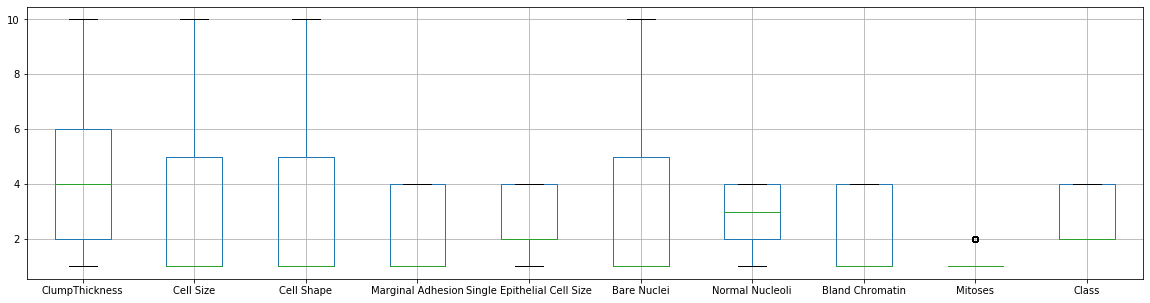

In [28]:
df_new.boxplot(figsize= (20,5))

In [29]:
df_new.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.004292,2.590844,3.486409,2.636624,1.932761,1.171674,2.689557
std,2.815741,3.051459,2.971913,1.294128,0.965732,3.621929,1.134066,1.304521,0.377367,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,4.000000,4.000000,10.000000,4.000000,4.000000,2.000000,4.000000


In [30]:
# We could see most of tahe outliers are now removed.


In [31]:
df_new = df_new.drop(['Class'], axis =1)
df_new

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,4,4,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,4,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,4,3,4,4,2
697,4,8,6,4,3,4,4,4,1


# Q6 Create a covariance matrix for identifying Principal components

In [32]:
# PCA
# Step 1 - Create covariance matrix


In [33]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
data_new = df_new.apply(zscore)

X_std = StandardScaler().fit_transform(data_new)
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00143266 0.64583645 0.65552689 0.55151351 0.58748529 0.5908535
  0.54459762 0.57441661 0.44270396]
 [0.64583645 1.00143266 0.90818117 0.71521785 0.77481515 0.68765657
  0.66589903 0.72708042 0.49446483]
 [0.65552689 0.90818117 1.00143266 0.69734899 0.7529968  0.70848734
  0.65627931 0.7185753  0.46579632]
 [0.55151351 0.71521785 0.69734899 1.00143266 0.69249032 0.69254131
  0.60031999 0.65284973 0.41859559]
 [0.58748529 0.77481515 0.7529968  0.69249032 1.00143266 0.68503965
  0.6328274  0.72403296 0.45706035]
 [0.5908535  0.68765657 0.70848734 0.69254131 0.68503965 1.00143266
  0.64218904 0.64035854 0.4667265 ]
 [0.54459762 0.66589903 0.65627931 0.60031999 0.6328274  0.64218904
  1.00143266 0.65065116 0.37750481]
 [0.57441661 0.72708042 0.7185753  0.65284973 0.72403296 0.64035854
  0.65065116 1.00143266 0.49856522]
 [0.44270396 0.49446483 0.46579632 0.41859559 0.45706035 0.4667265
  0.37750481 0.49856522 1.00143266]]


# Q7 Identify eigen values and eigen vector

In [34]:
# Step 2- Get eigen values and eigen vector

In [35]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [36]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.30825508 -0.09115248  0.01939961  0.89929339 -0.09361601  0.09656433
  -0.0621979  -0.25286508  0.0408306 ]
 [-0.36993123  0.08656026  0.72018255  0.03385444  0.30762132 -0.26377113
   0.09474638  0.37952805  0.13647228]
 [-0.3671251   0.11924139 -0.681547    0.09104745  0.29836007 -0.22524155
   0.22712444  0.43034016  0.04091511]
 [-0.3353375   0.16311529 -0.04758838 -0.24046507  0.23224378  0.53282021
  -0.0166133  -0.2877414   0.61639954]
 [-0.35198311  0.10840828 -0.0649552  -0.15951623  0.22902498 -0.13802704
  -0.77180143 -0.18859382 -0.36323815]
 [-0.33959251  0.05860885  0.0863284  -0.09163262 -0.16226322  0.61637367
   0.24444627  0.2128345  -0.59505835]
 [-0.32036192  0.23235395 -0.02657941 -0.12300974 -0.81666598 -0.17678573
  -0.17045255  0.1854764   0.25669033]
 [-0.34385373 -0.01263114  0.01613379 -0.21731998 -0.05543355 -0.39501838
   0.49399782 -0.62971379 -0.18555615]
 [-0.24660754 -0.93490009 -0.03938584 -0.16676588 -0.06965102  0.01443275
  -0

# Q8 Find variance and cumulative variance by each eigen vector

In [37]:
tot =sum(eig_vals)
print(tot)

9.012893982808029


In [38]:
var_expl = [(i/tot)*100 for i in sorted(eig_vals , reverse =True)]
var_expl

[67.01318326918151,
 7.733655021639592,
 5.379296719843427,
 4.760232798070334,
 4.465029769639817,
 3.576679473745919,
 3.250596130405989,
 2.8302273968962863,
 0.9910994205771486]

In [39]:
cum_expl = np.cumsum(var_expl)
cum_expl

array([ 67.01318327,  74.74683829,  80.12613501,  84.88636781,
        89.35139758,  92.92807705,  96.17867318,  99.00890058,
       100.        ])

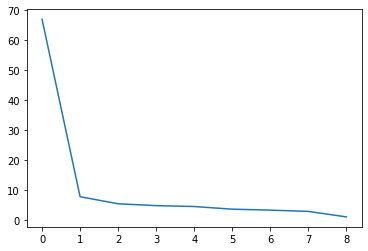

In [40]:
#var_eg
plt.plot(var_expl)

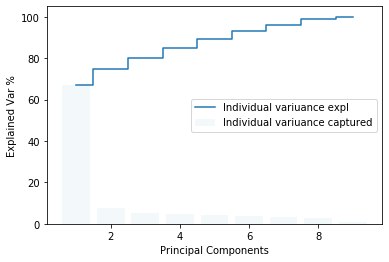

In [41]:
plt.bar(range(1,eig_vals.size+1), var_expl, alpha=.05, align='center', label='Individual variuance captured')
plt.step(range(1,eig_vals.size+1), cum_expl,where='mid', label='Individual variuance expl')
plt.ylabel('Explained Var %')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [42]:
from sklearn.decomposition import PCA

from sklearn import datasets
data_new.head(10)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.206936,-0.699995,-0.743299,-0.776593,-0.612248,-0.686979,0.320648,-0.715534,-0.455251
1,0.206936,0.283845,0.266875,1.543230,1.460203,1.799664,0.320648,0.051580,-0.455251
2,-0.503866,-0.699995,-0.743299,-0.776593,-0.612248,-0.410685,0.320648,-0.715534,-0.455251
3,0.562336,1.595632,1.613773,-0.776593,0.423978,0.141902,0.320648,1.585807,-0.455251
4,-0.148465,-0.699995,-0.743299,0.769956,-0.612248,-0.686979,0.320648,-0.715534,-0.455251
5,1.273138,2.251526,2.287222,1.543230,1.460203,1.799664,1.203062,1.585807,-0.455251
6,-1.214667,-0.699995,-0.743299,-0.776593,-0.612248,1.799664,0.320648,-0.715534,-0.455251
7,-0.859266,-0.699995,-0.406574,-0.776593,-0.612248,-0.686979,0.320648,-0.715534,-0.455251
8,-0.859266,-0.699995,-0.743299,-0.776593,-0.612248,-0.686979,-1.444180,-0.715534,2.196588
9,-0.148465,-0.372048,-0.743299,-0.776593,-0.612248,-0.686979,-0.561766,-0.715534,-0.455251


In [43]:
pca = PCA(n_components=7)
data_reduced = pca.fit_transform(data_new)
data_reduced

array([[-1.43284334, -0.10776004, -0.63405653, ...,  0.16127846,
         0.01456823, -0.20077628],
       [ 1.91758196, -1.05249537,  0.52365525, ..., -1.53135192,
        -0.18949779,  0.56852095],
       [-1.55812419, -0.18874459,  0.0304799 , ...,  0.05961635,
         0.25310989, -0.00734296],
       ...,
       [ 3.93531506,  1.06931021,  0.79412503, ...,  1.77062176,
         0.72832038, -0.68591505],
       [ 2.42308302, -1.25490103,  0.86230292, ...,  0.64148728,
        -0.27181745, -0.92822837],
       [ 3.12888426, -1.46373273,  0.99159939, ...,  0.765903  ,
        -0.11862613, -0.4149751 ]])

In [44]:
pca.components_

array([[ 0.30825508,  0.36993123,  0.3671251 ,  0.3353375 ,  0.35198311,
         0.33959251,  0.32036192,  0.34385373,  0.24660754],
       [ 0.09115248, -0.08656026, -0.11924139, -0.16311529, -0.10840828,
        -0.05860885, -0.23235395,  0.01263114,  0.93490009],
       [-0.89929339, -0.03385444, -0.09104745,  0.24046507,  0.15951623,
         0.09163262,  0.12300974,  0.21731998,  0.16676588],
       [ 0.09361601, -0.30762132, -0.29836007, -0.23224378, -0.22902498,
         0.16226322,  0.81666598,  0.05543355,  0.06965102],
       [-0.09656433,  0.26377113,  0.22524155, -0.53282021,  0.13802704,
        -0.61637367,  0.17678573,  0.39501838, -0.01443275],
       [-0.25286508,  0.37952805,  0.43034016, -0.2877414 , -0.18859382,
         0.2128345 ,  0.1854764 , -0.62971379,  0.11055694],
       [-0.0408306 , -0.13647228, -0.04091511, -0.61639954,  0.36323815,
         0.59505835, -0.25669033,  0.18555615, -0.10829747]])

# Q10 Find correlation between components and features

In [45]:
data_new.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses'],
      dtype='object')

In [46]:
col = ['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses']

In [47]:
df_com = pd.DataFrame(pca.components_,columns=col)

In [48]:
df_com

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.308255,0.369931,0.367125,0.335338,0.351983,0.339593,0.320362,0.343854,0.246608
1,0.091152,-0.086560,-0.119241,-0.163115,-0.108408,-0.058609,-0.232354,0.012631,0.934900
2,-0.899293,-0.033854,-0.091047,0.240465,0.159516,0.091633,0.123010,0.217320,0.166766
3,0.093616,-0.307621,-0.298360,-0.232244,-0.229025,0.162263,0.816666,0.055434,0.069651
4,-0.096564,0.263771,0.225242,-0.532820,0.138027,-0.616374,0.176786,0.395018,-0.014433
5,-0.252865,0.379528,0.430340,-0.287741,-0.188594,0.212834,0.185476,-0.629714,0.110557
6,-0.040831,-0.136472,-0.040915,-0.616400,0.363238,0.595058,-0.256690,0.185556,-0.108297


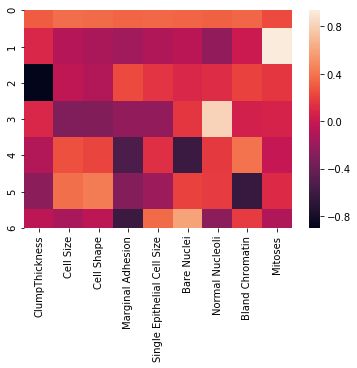

In [49]:
import seaborn as sns
sns.heatmap(df_com)